<a href="https://colab.research.google.com/github/Aisha-Hagar/WideBot_Task3/blob/main/WideBot_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

Task 3 - Classification
Using the same data in task 2, build a machine learning based classifier and show its
performance on the test-set. Show precision, recall, f-score, accuracy for each class and for
the whole test data. Please describe briefly the meaning of each result and metric for this
specific task. Also, please write some enhancements that you may think about to achieve
better results.
Note: add a readme file that describes the whole training process in briefed points. Note:
Use stories data only (not comments). Also, take the last 20% of each file as a test-set.

#**Setup**

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [29]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
!mkdir archive
!unzip archive.zip -d archive

mkdir: cannot create directory ‘archive’: File exists
Archive:  archive.zip
replace archive/comments_art-et-culture.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [43]:
def readFiles(path, prefix):
  files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and i.startswith(prefix)]
  df = pd.concat((pd.read_csv(os.path.join(path,f), index_col=0) for f in files), ignore_index=True)
  return df

In [44]:
#Combine all the files into one dataframes
stories = readFiles('archive', 'stories')

EDA was already done in task 2. So, the necessary preprocessing will be applied according to what was found in task 2.

In [45]:
#Create a set of stopwords and punctuation to be removed
stopwords_punct = set(stopwords.words('arabic')+stopwords.words('english')+stopwords.words('french')+list(punctuation)+list('،'))

In [46]:
def filterWords(text, stopwords):
  text_tokens = word_tokenize(text)
  return " ".join([word for word in text_tokens if not word in stopwords])

In [47]:
stories['filtered'] = stories['story'].apply(lambda s: filterWords(s,stopwords_punct))

In [48]:
#Split the data 80% train, 20% test
y = stories.topic
X_train, X_test, y_train, y_test = train_test_split(stories['filtered'], y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [49]:
print(X_train.shape)
print(X_test.shape)

(8800,)
(2200,)


In [50]:
#Create a pipeline: TFIDF transformation then LogisticRegression classifier
pipe_LR= Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', LogisticRegression(max_iter = 200))
                   ])

pipe_LR.fit(X_train, y_train)
y_pred_LR = pipe_LR.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred_LR))

                    precision    recall  f1-score   support

    art-et-culture       0.79      0.92      0.85       200
          economie       0.86      0.84      0.85       200
      faits-divers       0.95      0.95      0.95       200
marocains-du-monde       0.84      0.86      0.85       200
            medias       0.94      0.89      0.91       200
           orbites       0.70      0.71      0.70       200
         politique       0.77      0.80      0.78       200
           regions       0.82      0.82      0.82       200
           societe       0.74      0.72      0.73       200
             sport       0.98      0.96      0.97       200
         tamazight       0.97      0.85      0.90       200

          accuracy                           0.85      2200
         macro avg       0.85      0.85      0.85      2200
      weighted avg       0.85      0.85      0.85      2200



The classification report shows:

accuracy of 85%

avg precision of 85%

avg recall of 85%

avg f1-score of 85%

* Some classes have precision higher than recall such as Tamazight which indicates that most misclassifications were directed to one class

* Some classes have recall higher than precision such as art-et-culture which indicates that most misclassifications were distributed across multiple classes

* Since the data is balanced, we can safely evaluate the performance of the model through the accuracy metric.

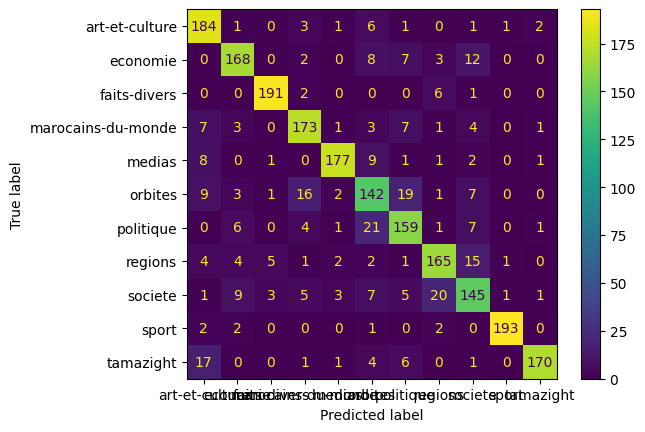

In [52]:
cm = confusion_matrix(y_test, y_pred_LR, labels=pipe_LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_LR.classes_)
disp.plot()

The confusion matrix shows with more details where the misclassifications occurred:



*   Most Tamazight misclassification were classified as art-et-culture
*   Most Societe misclassification were classified as regions
*   Most regions misclassification were classified as Societe
*   Most politique misclassification were classified as orbites
*   Most orbites misclassification were classified as politique or marocains-du-monde
*   Most orbites misclassification were classified as politique





